In [18]:
# read the JSON data from the file and get the wavefunction_cutoff
import json

EXCLUDE_ELEMENTS = ['At', 'Fr', 'Po', 'Ra', 'Rn', 'La', 'Ce', 'Pr', 'Nd', 'Pm', 'Sm', 'Eu', 'Gd', 'Tb', 'Dy', 'Ho', 'Er', 'Tm', 'Yb', 'Lu', 'He', 'Ne', 'Ar', 'Kr', 'Xe']

with open('./lib_sssp_curated_efficiency_v0.json') as f:
    eff_data = json.load(f)
    
eff_ecutwfc_lst = []
for k, v in eff_data.items():
    element = k.split('.')[0]
    if element in EXCLUDE_ELEMENTS:
        continue

    eff_ecutwfc_lst.append(v['wavefunction_cutoff'])

with open('./lib_sssp_curated_precision_v0.json') as f:
    prec_data = json.load(f)
    
prec_ecutwfc_lst = []
for k, v in prec_data.items():
    element = k.split('.')[0]
    if element in EXCLUDE_ELEMENTS:
        continue

    prec_ecutwfc_lst.append(v['wavefunction_cutoff'])

# for old prec version
with open('./SSSP_1.3.0_PBE_precision.json') as f:
    old_prec_data = json.load(f)

old_prec_ecutwfc_lst = []
for k, v in old_prec_data.items():
    element = k.split('.')[0]
    if element in EXCLUDE_ELEMENTS:
        continue

    old_prec_ecutwfc_lst.append(v['cutoff_wfc'])

# for old eff version
with open('./SSSP_1.1.2_PBE_efficiency.json') as f:
    old_eff_data = json.load(f)

old_eff_ecutwfc_lst = []
for k, v in old_eff_data.items():
    element = k.split('.')[0]
    if element in EXCLUDE_ELEMENTS:
        continue

    old_eff_ecutwfc_lst.append(v['cutoff_wfc'])

with open('./lib_nc_curated_precision_v1.json') as f:
    nc_prec_data = json.load(f)
    
nc_prec_ecutwfc_lst = []
for k, v in nc_prec_data.items():
    element = k.split('.')[0]
    if element in EXCLUDE_ELEMENTS:
        continue

    nc_prec_ecutwfc_lst.append(v['wavefunction_cutoff'])

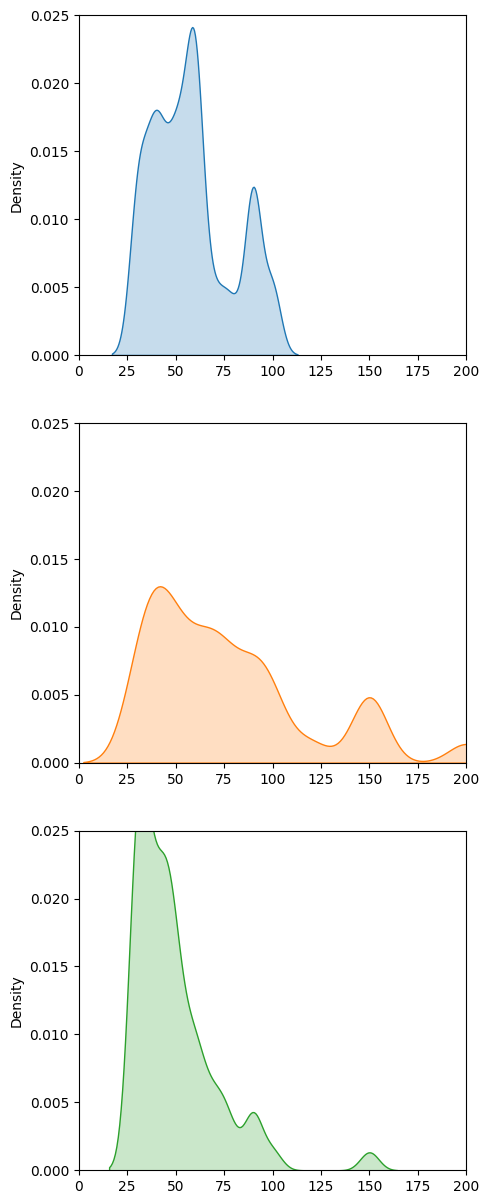

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(4, 1, figsize=(5, 20))

color_list = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd", "#8c564b", "#e377c2", "#7f7f7f", "#bcbd22", "#17becf"]

# Create a KDE plot
sns.kdeplot(old_prec_ecutwfc_lst, bw_adjust=0.5, color=color_list[0], fill=True, ax=ax[0])
sns.kdeplot(prec_ecutwfc_lst, bw_adjust=0.5, color=color_list[1], fill=True, ax=ax[1])
sns.kdeplot(eff_ecutwfc_lst, bw_adjust=0.5, color=color_list[2], fill=True, ax=ax[2])
sns.kdeplot(nc_prec_ecutwfc_lst, bw_adjust=0.5, color=color_list[3], fill=True, ax=ax[3])

# set y limit same for both plots
Y_MAX = 0.025
X_MAX = 200
for i in range(3):
    ax[i].set_xlim(0, X_MAX)
    ax[i].set_ylim(0, Y_MAX)

# Adding title for whole figure
#fig.suptitle('Wavefunction Cutoff Distribution', fontsize=16)


# Show plot
plt.show()